<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/05/05_note_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA Part2

79. Principal component analysis for dimensionality reduction
80. 💻 *Demo: Performing PCA by using eigendecomposition*
81. Principal component analysis in sklearn
82. 💻 *Demo: PCA in sklearn (artificial data)*
    - scikit-learn
83. 💻 *Demo: PCA in sklearn (real data)*
    - loading plot
    - svd_solver
    - 資料 scale 的影響
84. Guidelines for choosing number of principal component
85. 💻 *Demo : Choosing number of principal components*
    - knee method
    - de-noise
    - 可視化的侷限
86. Chapter summary

#### Dimensionality Reduction

$Y=P^TX$
- $P$: $p \times p$
- $P^T$: $p \times p$
- $X$: $p \times n$
- $Y$: $p \times n$

$Y^{'}=(P^{'})^TX$
- $P^{'}=P_{:,p_1}$: $p \times p_1$ $\hspace{1em}$ $(p_1 < p)$
- $(P^{'})^T$: $p_1 \times p$
- $X$: $p \times n$
- $Y^{'}$: $p_1 \times n$

PCA 用途:
- 降低維度, 保持大部份的 variance
- 對資料進行去噪 (de-noising)
    - 多數 variance 為資訊
    - 少數 variance 為雜訊
- 資料視覺化

#### PCA 限制

- 要求所有 feature 具有相似的 scale
- 對 outlier 很敏感
    - outlier 會大大影響 variance
- principal component 不好解讀
- **`Q1: 無法捕捉非線性關係`**

#### Loading Plot

- 可視化原始 feature 對 principal components 的貢獻程度
- loading: 原始 feature 對 principal components 的貢獻程度的向量

$\begin{aligned}
Y_{:,j} &= P^TX_{:,j} \\
        &= \sum_{k=1}^{p}(P^T)_{:,k}(X_{:,j})_{k}
\end{aligned}$

$k$th loading: $(P^T)_{:,k}$

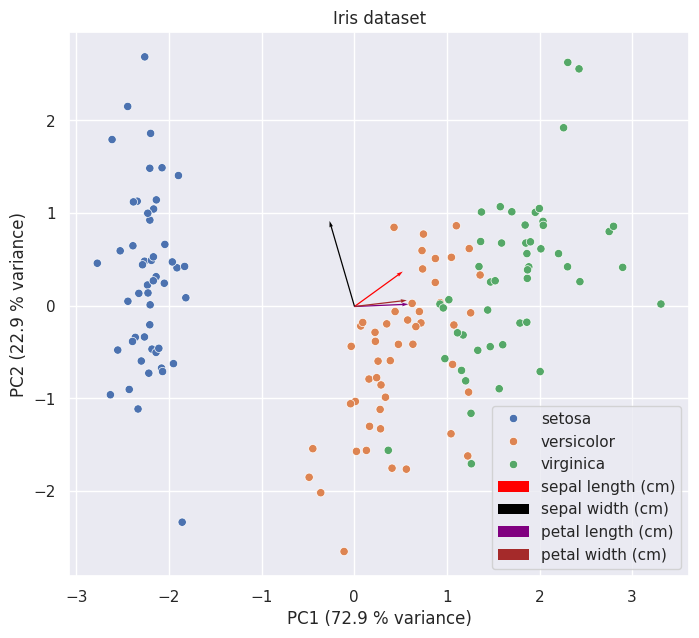

#### scikit-learn PCA

```python
class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False,
  svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10,
  power_iteration_normalizer='auto', random_state=None)
```

svd_solver: 求解 eigenvector、eigenvalue
- `full`: SVD 求得精確 eigenvector、eigenvalue
- `arpack`: 近似解
  ```python
  n_components <= min(n_features, n_samples)-1
  ```
- `randomized`: 近似解
- 精確度: `full` > `arpack` > `randomized`
- 效率: `full` < `arpack` < `randomized`
- `default`: 依輸入資料的大小與 `n_components` 決定使用 `randomized` 或 `full`

method:
- `fit(X)`: 計算 principal component
- `transform(X)`: 轉換座標軸
- `fit_transform(X)`
- `inverse_transform(X)`: 轉為原始座標軸
    - `X`: 列向量對應一筆資料


attribute:
- `components_`: principal component 為列向量的 transformation matrix
- `explained_variance_`: eigenvalues
- `explained_variance_ratio_`: normalized explained_variance_
- `mean_`: 估計的 feature mean


#### Principal Component 個數挑選

- 決定要保留 variance 的百分比
- knee method
    - 計算 explained variance percentage 的 cumulative sum
    - 找到 knee/elbow 點 (curvature 最大的點)
- 領域知識

[doc](https://pypi.org/project/kneed/#documentation)
[api](https://kneed.readthedocs.io/en/latest/api.html#kneed.knee_locator.KneeLocator)
```python
class kneed.knee_locator.KneeLocator(
  x: Iterable [float], y: Iterable[float],
  S: float = 1.0, curve: str = 'concave',
  direction: str = 'increasing',
  interp_method: str = 'interp1d',
  online: bool = False, polynomial_degree: int = 7)
```
- `curve`
    - `concave`: 偵測 knee
    - `convex`: 偵測 elbow

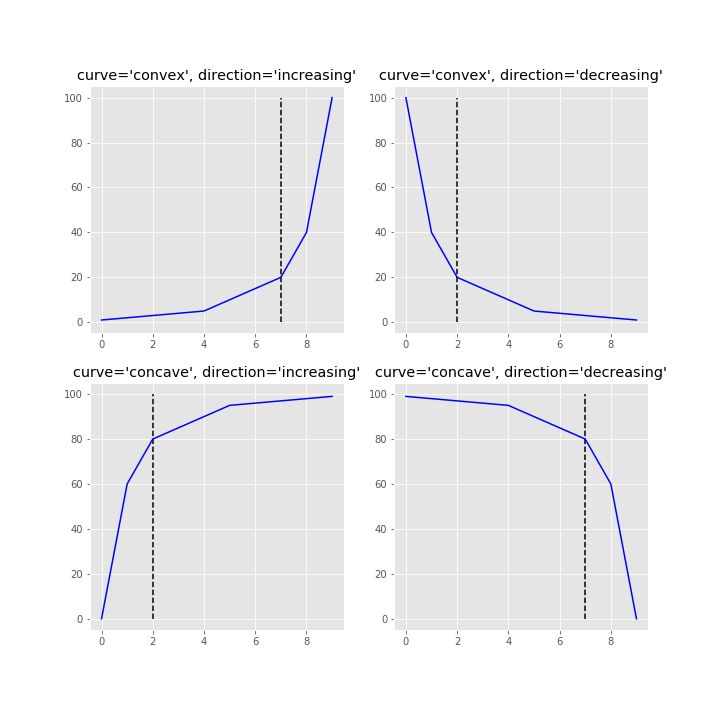

#### Demo

##### 80.Demo: PCA in sklearn (artificial data)

###### 2D

eigenvalues:
```
[2.22793497, 0.02206503]
```

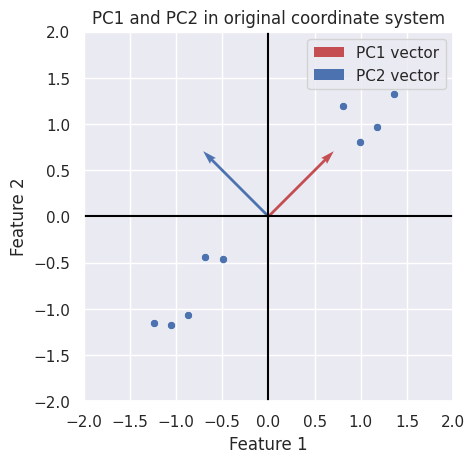
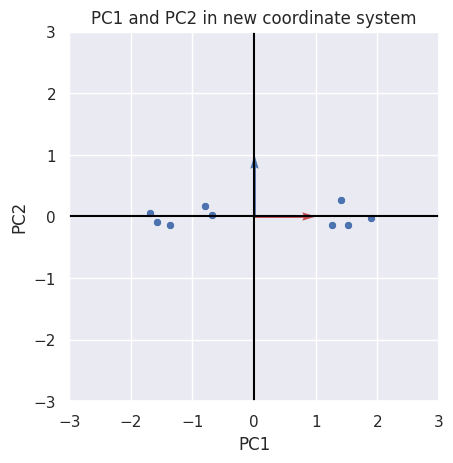

###### 3D

explained variance ratios:
```
[84.44956128, 15.55043872, 0.]
```



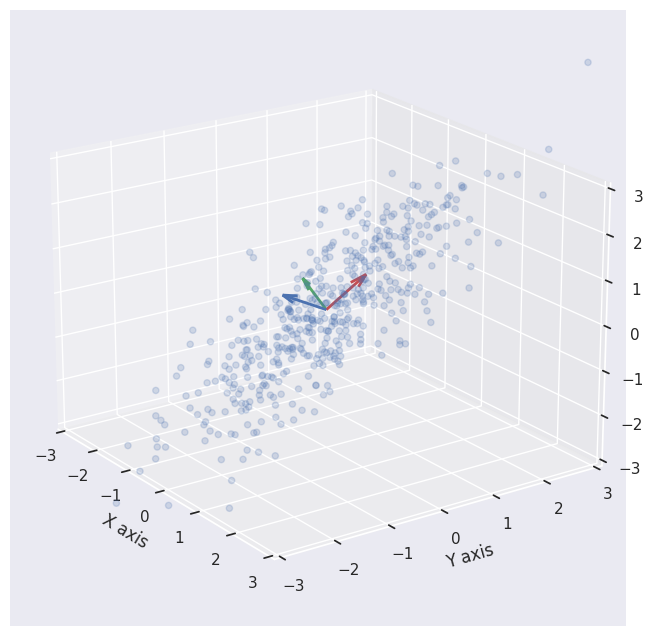
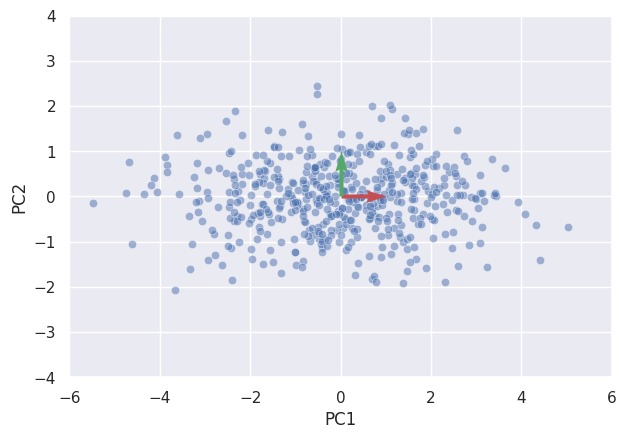

##### 83.Demo: PCA in sklearn (real data)

###### iris

iris dataset

explained variance ratios:
```
[72.96244541329987, 22.850761786701778, 3.6689218892828763, 0.5178709107154797]
```

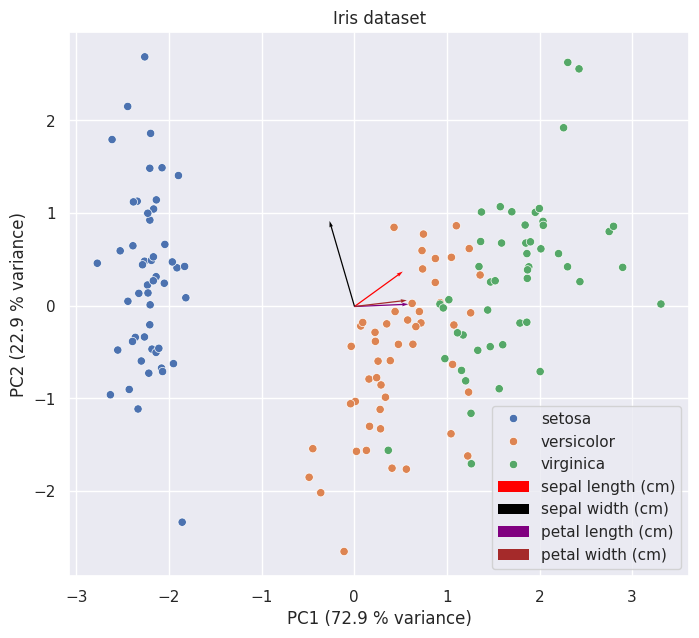

###### wine

wine dataset

explained variance ratios:
```
[36.19884809992633,
 19.20749025700898,
 11.123630536249934,
 7.069030182714045,
 6.563293679648595,
 4.9358233192225756,
 4.238679322623315,
 2.680748948378868,
 2.222153404789714,
 1.9300190939440784,
 1.7368356899899149,
 1.29823257560421,
 0.7952148898994515]
```

curve="concave"

knee point

**`Q2: knee point 不是斜率變化最大的點`**

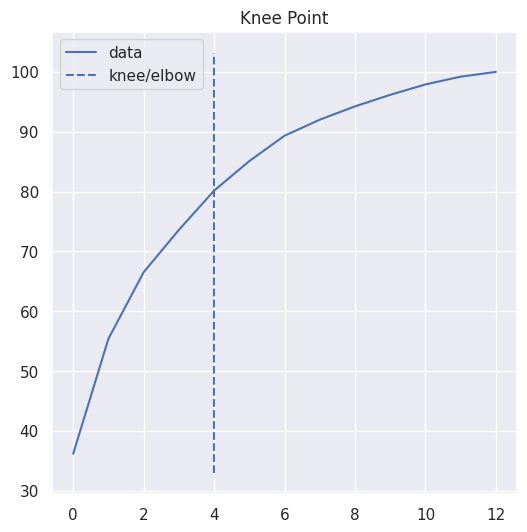

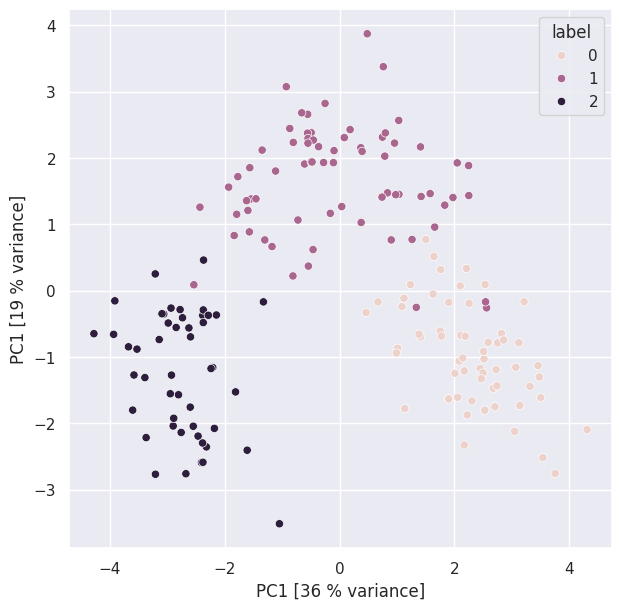

##### 85.Demo : Choosing number of principal components

mnist dataset

top 2 explained variance ratios:
```
[9.74611592, 7.15544459]
```

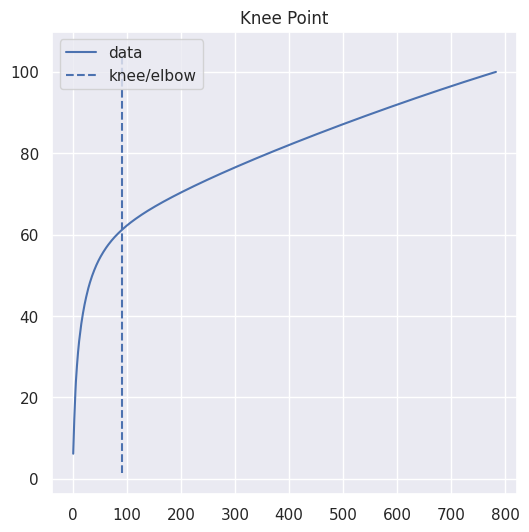

可視化的侷限
- **`Q3: 無法只用 top 2 principal component 來總結 (但 UMAP 可以)`**

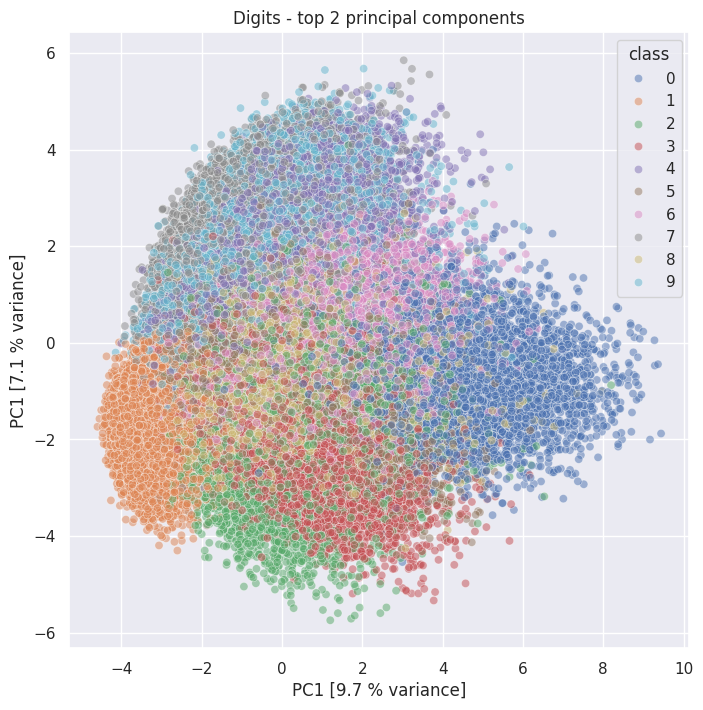

#### 問題

##### **`Q1: 無法捕捉非線性關係`**

提供最接近資料的低維 linear surface (?)

![][image1]

[image1]: <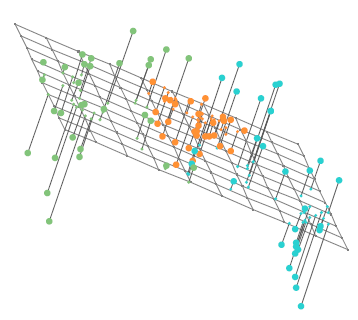>
[圖源](https://www.statlearning.com/)

##### **`Q2: knee point 不是斜率變化最大的點`**

[參考](http://www.cs.williams.edu/~jeannie/papers/kneedle-simplex11-slides.pdf) (?)

##### **`Q3: 無法只用 top 2 principal component 來總結 (但 UMAP 可以)`**

- PCA 保留資料模式, variance 對應資訊量
- 但針對特殊任務而言, variance 不一定提供對任務有用的資訊 (?)
- 如果提供最接近資料的低維 (非線性) surface, 再投影在 2D 平面上, 也許比較能呈現針對特殊任務的資訊 (?)
